# First thing is to import all the required python libraries
* 1) Sklearn
* 2) Numpy
* 3) Pandas
* 4) Matplotlib
* 5) Seaborn
* 6) Sklearn
* 7) Sklearn
* 8) Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ARDRegression, LogisticRegression
from sklearn.metrics import average_precision_score, confusion_matrix, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(54808, 13)

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


# We have got our data and all the required libraries time to perform Preprocessing on data
* Data Cleaning
* Data Transformations
* Data Redundancy
* Data Inconsistency
* Data Integrity

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [6]:
Null_values_containing_columns = ["education", "previous_year_rating"]

In [7]:
data["education"].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [8]:
data.dropna(subset="education", inplace=True)

In [9]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
data['previous_year_rating'].fillna(np.mean(data['previous_year_rating']), inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           52399 non-null  int64  
 1   department            52399 non-null  object 
 2   region                52399 non-null  object 
 3   education             52399 non-null  object 
 4   gender                52399 non-null  object 
 5   recruitment_channel   52399 non-null  object 
 6   no_of_trainings       52399 non-null  int64  
 7   age                   52399 non-null  int64  
 8   previous_year_rating  52399 non-null  float64
 9   length_of_service     52399 non-null  int64  
 10  awards_won?           52399 non-null  int64  
 11  avg_training_score    52399 non-null  int64  
 12  is_promoted           52399 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.6+ MB


In [12]:
for i in data.columns:
    print(i, ":", data[i].unique())
    print("   ")

employee_id : [65438 65141  7513 ... 74592 13918 51526]
   
department : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
   
region : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
   
education : ["Master's & above" "Bachelor's" 'Below Secondary']
   
gender : ['f' 'm']
   
recruitment_channel : ['sourcing' 'other' 'referred']
   
no_of_trainings : [ 1  2  3  4  7  5  6  8 10  9]
   
age : [35 30 34 39 45 31 33 28 32 49 37 38 27 29 26 57 40 42 23 59 44 50 56 20
 25 41 47 36 46 60 24 43 54 22 58 48 55 51 52 53 21]
   
previous_year_rating : [5.         3.         1.         4.  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21860\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

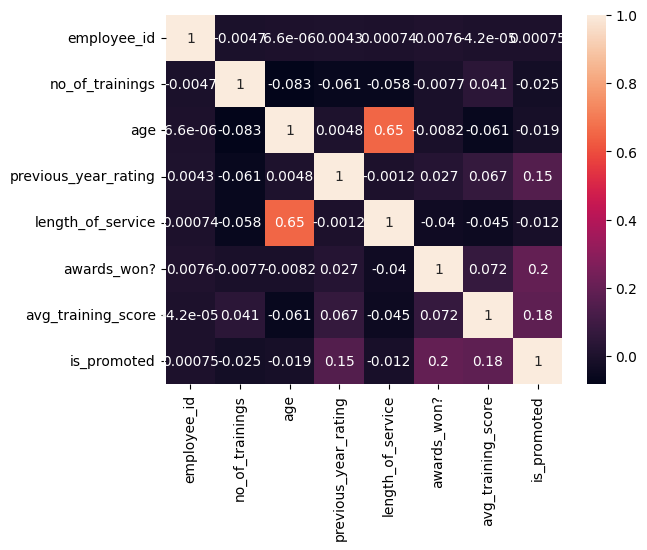

In [13]:
sns.heatmap(data.corr(), annot=True)

### From above heat map it seems we need to focus on only few columns like award_won, avg_training_score and previous_year_rating but im taking some other columns as well for more accuracy
#### I will be going to drop columns containg strings

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           52399 non-null  int64  
 1   department            52399 non-null  object 
 2   region                52399 non-null  object 
 3   education             52399 non-null  object 
 4   gender                52399 non-null  object 
 5   recruitment_channel   52399 non-null  object 
 6   no_of_trainings       52399 non-null  int64  
 7   age                   52399 non-null  int64  
 8   previous_year_rating  52399 non-null  float64
 9   length_of_service     52399 non-null  int64  
 10  awards_won?           52399 non-null  int64  
 11  avg_training_score    52399 non-null  int64  
 12  is_promoted           52399 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.6+ MB


In [15]:
data.drop(columns=["employee_id", "department", "region", "education", "gender", "recruitment_channel"], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 0 to 54807
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       52399 non-null  int64  
 1   age                   52399 non-null  int64  
 2   previous_year_rating  52399 non-null  float64
 3   length_of_service     52399 non-null  int64  
 4   awards_won?           52399 non-null  int64  
 5   avg_training_score    52399 non-null  int64  
 6   is_promoted           52399 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.2 MB


## I have got clear data but the point is now i need to check whether data contains outliers because before training model i need to clear it other wise accuracy will reduce

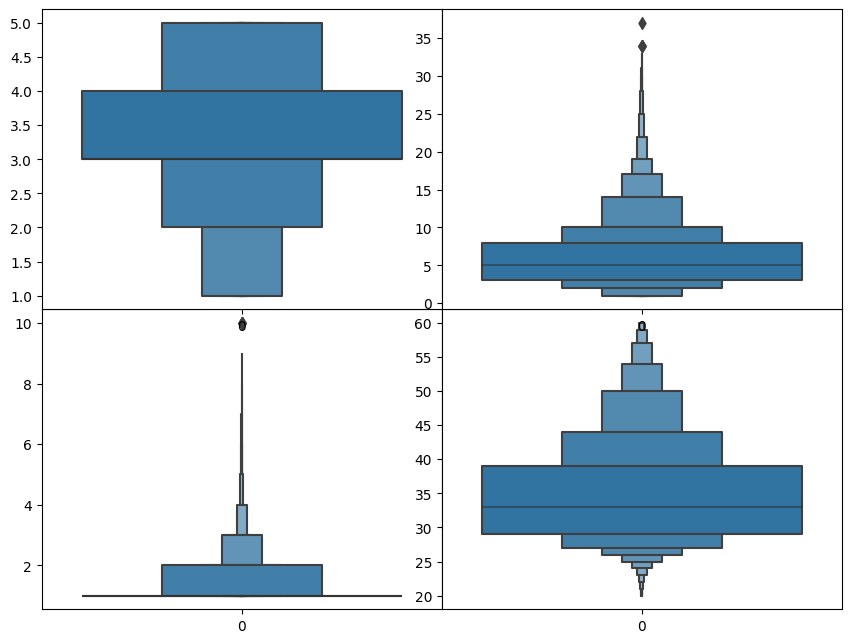

In [17]:
fig = plt.figure(figsize=(4,3))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1,0,1,1])
ax3 = fig.add_axes([0,1,1,1])
ax4 = fig.add_axes([1,1,1,1])
sns.boxenplot(data["no_of_trainings"], ax=ax1)
sns.boxenplot(data["age"], ax=ax2)
sns.boxenplot(data["previous_year_rating"], ax=ax3)
sns.boxenplot(data["length_of_service"], ax=ax4)
plt.show()

<Axes: >

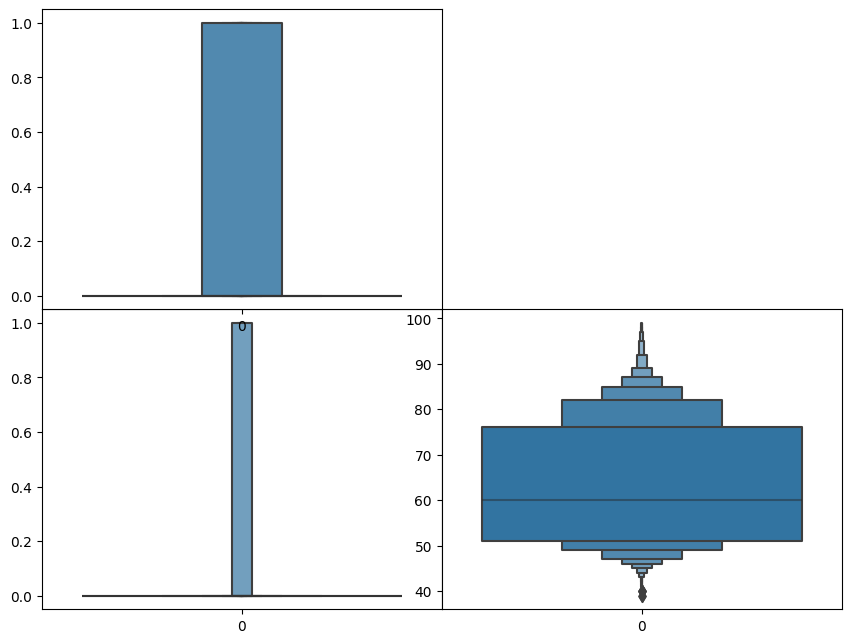

In [18]:
fig = plt.figure(figsize=(4,3))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1,0,1,1])
ax3 = fig.add_axes([0,1,1,1])

sns.boxenplot(data["awards_won?"], ax=ax1)
sns.boxenplot(data["avg_training_score"], ax=ax2)
sns.boxenplot(data["is_promoted"], ax=ax3)

# Im going to skip step of removing outliers for now lets check model by buiding with outliers

### But remember removing outliers is an important step

In [19]:
clf1 = LinearRegression()
clf2 = LogisticRegression()
clf3 = ARDRegression()

In [20]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
print(train.shape)
print(test.shape)

(41919, 7)
(10480, 7)


In [22]:
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
14370,1,42,2.000000,13,0,69,0
50177,1,41,1.000000,13,0,80,0
36787,1,34,4.000000,3,0,60,0
8690,1,26,3.337526,1,0,47,0
12435,2,31,1.000000,1,0,47,0


In [23]:
train_features = train[["no_of_trainings","age","previous_year_rating","length_of_service","awards_won?","avg_training_score"]]
train_labels = train["is_promoted"]
test_features = test[["no_of_trainings","age","previous_year_rating","length_of_service","awards_won?","avg_training_score"]]
test_labels = test["is_promoted"]

In [24]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(41919, 6)
(41919,)
(10480, 6)
(10480,)


In [25]:
clf1.fit(train_features, train_labels)
clf2.fit(train_features, train_labels)
clf3.fit(train_features, train_labels)

ARDRegression()

In [26]:
pred_lables_clf1 = clf1.predict(test_features)
pred_lables_clf2 = clf2.predict(test_features)
pred_lables_clf3 = clf3.predict(test_features)

In [27]:
print("Accuracy of model 1 :", clf1.score(test_features, test_labels))
print("Accuracy of model 2 :", clf2.score(test_features, test_labels))
print("Accuracy of model 3 :", clf3.score(test_features, test_labels))

Accuracy of model 1 : 0.0953493951791956
Accuracy of model 2 : 0.9190839694656489
Accuracy of model 3 : 0.07260958870422252


### Model 2 accuracy looks 91% and other models are 9% and 7% there might be some mistakes in data Processing but model 2 gives best out put by this one lets check error

In [28]:
print("Mean Absolut Error of model 1 :", mean_absolute_error(test_labels, pred_lables_clf1))
print("Mean Absolut Error of model 2 :", mean_absolute_error(test_labels, pred_lables_clf2))
print("Mean Absolut Error of model 3 :", mean_absolute_error(test_labels, pred_lables_clf3))

Mean Absolut Error of model 1 : 0.15025592008720418
Mean Absolut Error of model 2 : 0.08091603053435115
Mean Absolut Error of model 3 : 0.14825718803854387


In [29]:
print("Mean Absolut Error of model 1 :", mean_squared_error(test_labels, pred_lables_clf1))
print("Mean Absolut Error of model 2 :", mean_squared_error(test_labels, pred_lables_clf2))
print("Mean Absolut Error of model 3 :", mean_squared_error(test_labels, pred_lables_clf3))

Mean Absolut Error of model 1 : 0.07151771966262759
Mean Absolut Error of model 2 : 0.08091603053435115
Mean Absolut Error of model 3 : 0.07331542929327739


### Do not always depend on Means Squared error because it balances the output and it us far different out comes

In [31]:
import pickle

# Assuming clf2 is your trained model
with open('LogisticRegression_model.pkl' ,'wb') as file:
    pickle.dump(clf2, file)